In [27]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
import numpy as np

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
print(rng)

noise = rng.normal(size=(len(cancer.data), 50))
print(noise)
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

RandomState(MT19937)
[[ 0.49671415 -0.1382643   0.64768854 ...  1.05712223  0.34361829
  -1.76304016]
 [ 0.32408397 -0.38508228 -0.676922   ...  0.26105527  0.00511346
  -0.23458713]
 [-1.41537074 -0.42064532 -0.34271452 ... -1.32045661  0.52194157
   0.29698467]
 ...
 [ 1.11295534  0.14004307  0.95501349 ...  0.05174335  1.64878597
  -0.13855742]
 [-0.36133539 -0.02436784  2.17920511 ...  0.10180644 -0.39580383
  -0.41925995]
 [ 0.1547812  -1.00213838 -1.00802206 ...  0.4845971   0.14160101
  -1.11543425]]


In [18]:
cancer.data.shape

(569, 30)

In [7]:
X_w_noise.shape

(569, 80)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)

select.fit(X_train, y_train)

# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False] <class 'numpy.ndarray'>


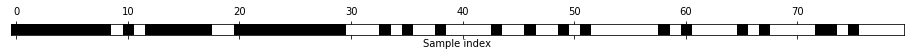

In [23]:
import matplotlib.pyplot as plt

mask = select.get_support() # gets selected features
print(mask, type(mask))

# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())
plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)

print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.916
Score with only selected features: 0.354


In [31]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median") 
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

mask = select.get_support()
print(mask)

print('Threshold_: ', select.threshold_)
#print('estimate coef: ', select.estimator_.coef_)
#print('feature_importances: ', select.feature_importances_)
#print('feature_coeff: ', select.feature_coeff_)
#print('feature_coeff: ', select.coef_)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False  True False
 False False False False  True False False  True False  True  True False
 False False  True False False  True  True False False False False False
 False  True False False False False False False False  True False False
 False  True False False False False False False]
Threshold_:  0.002299847874635568
X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)
Test score: 0.930


In [1]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [3]:
import pandas as pd

df= pd.read_csv(r'C:\Users\karan\Desktop\DS ipynb\iris.csv')
df.shape

(150, 5)

In [6]:
count_classes = pd.value_counts(df['class'], sort = True)
print(count_classes, type(count_classes))

versicolor    50
virginica     50
setosa        50
Name: class, dtype: int64 <class 'pandas.core.series.Series'>


In [10]:
counts = df['class'].value_counts(sort=True)
print(counts, type(counts))

versicolor    50
virginica     50
setosa        50
Name: class, dtype: int64 <class 'pandas.core.series.Series'>


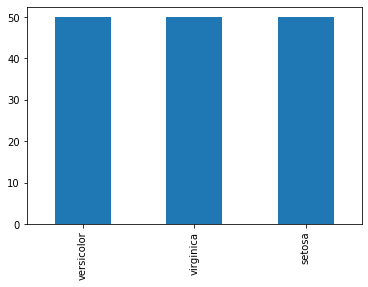

In [17]:
import matplotlib.pyplot as plt

counts.plot(kind = 'bar')
plt.xticks(range(len(counts)))
plt.show()

In [43]:
import pandas as pd
import numpy as np

test = pd.DataFrame({'days': [0,1,5,10,20,15,9,30,21, 31,8, 7,45,60]})
arr = np.array([0,5,30,20,60])

test['range1'] = arr.searchsorted(test.days)
test

,days,range1
0,0,0
1,1,1
2,5,1
3,10,2
4,20,2
5,15,2
6,9,2
7,30,4
8,21,2
9,31,4


In [8]:
test = pd.DataFrame({'days': [0,20,30,31,45,60,1, 12, 50, 33]})

test['range1'] = pd.cut(test.days, [0,30,60], include_lowest=True)

#30 value is in [30, 60) group
test['range2'] = pd.cut(test.days, [0,30,60], right=False)

#30 value is in (0, 30] group
test['range3'] = pd.cut(test.days, [0,30,60])

print (test)
test.info()

   days          range1        range2        range3
0     0  (-0.001, 30.0]   [0.0, 30.0)           NaN
1    20  (-0.001, 30.0]   [0.0, 30.0)   (0.0, 30.0]
2    30  (-0.001, 30.0]  [30.0, 60.0)   (0.0, 30.0]
3    31    (30.0, 60.0]  [30.0, 60.0)  (30.0, 60.0]
4    45    (30.0, 60.0]  [30.0, 60.0)  (30.0, 60.0]
5    60    (30.0, 60.0]           NaN  (30.0, 60.0]
6     1  (-0.001, 30.0]   [0.0, 30.0)   (0.0, 30.0]
7    12  (-0.001, 30.0]   [0.0, 30.0)   (0.0, 30.0]
8    50    (30.0, 60.0]  [30.0, 60.0)  (30.0, 60.0]
9    33    (30.0, 60.0]  [30.0, 60.0)  (30.0, 60.0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
days      10 non-null int64
range1    10 non-null category
range2    9 non-null category
range3    9 non-null category
dtypes: category(3), int64(1)
memory usage: 574.0 bytes


In [100]:
df = pd.DataFrame({'days': [0,1, 5, 20,18,30,31,45,60,65,70,75,12,51,66]})
num_buckets = 5

bound = np.arange(1.0, num_buckets) / num_buckets
print('bound:', bound)

quant = df.days.quantile(bound)
print('quant: \n', quant, type(quant))

bins = [quant[q] for q in quant.keys()]
print('bins: \n', bins)

df['days_bin'] = np.digitize(df.days, bins)
df

bound: [0.2 0.4 0.6 0.8]
quant: 
 0.2    10.6
0.4    26.0
0.6    47.4
0.8    65.2
Name: days, dtype: float64 <class 'pandas.core.series.Series'>
bins: 
 [10.600000000000001, 26.000000000000004, 47.400000000000006, 65.2]


,days,days_bin
0,0,0
1,1,0
2,5,0
3,20,1
4,18,1
5,30,2
6,31,2
7,45,2
8,60,3
9,65,3


In [95]:
df.days_bin.value_counts(sort = True)

4    3
3    3
2    3
1    3
0    3
Name: days_bin, dtype: int64

In [97]:
pd.value_counts(df['days_bin'], sort = True)

4    3
3    3
2    3
1    3
0    3
Name: days_bin, dtype: int64

In [59]:
bound = np.arange(1, 5) / 5
bound

array([0.2, 0.4, 0.6, 0.8])

In [98]:
for q in quant.keys(): 
    print(q, quant[q])

0.2 10.600000000000001
0.4 26.000000000000004
0.6 47.400000000000006
0.8 65.2


In [69]:
for q in quant: 
    print(q)

18.4
30.599999999999998
50.99999999999999
66.0


In [70]:
for q in quant.keys(): 
    print(quant[q])

18.4
30.599999999999998
50.99999999999999
66.0


Figure(720x216)
1 AxesSubplot(0.125,0.125;0.227941x0.755)
3 AxesSubplot(0.398529,0.125;0.227941x0.755)
9 AxesSubplot(0.672059,0.125;0.227941x0.755)


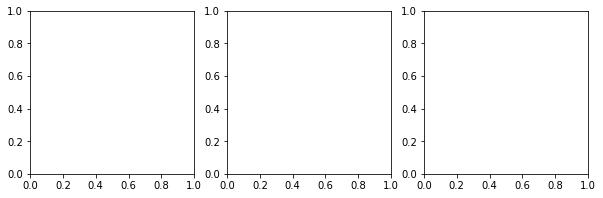

In [104]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

print(fig)
print(axes)

for n_neighbors, ax in zip([1, 3, 9], axes):
    print(n_neighbors, ax)
    


In [109]:
neighbors_settings = range(1, 11)
neighbors_settings

range(1, 11)

In [12]:
import numpy as np

weights = np.zeros((1,13))
print(weights)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [116]:
a = np.array([[1, 2, 3, 4, 5, 6]])
print(a.shape) 

b = np.array([[7,8,9,10,11,12]])
print(b.shape) 

c = np.dot(a, b)
print(c.shape)
print(c)

(1, 6)
(1, 6)


ValueError: shapes (1,6) and (1,6) not aligned: 6 (dim 1) != 1 (dim 0)

In [20]:
a = np.array([1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13])
print(a)
print(a.shape) 
print(a.T)
print(a.T.shape)

b = np.zeros((1,13))

c = np.dot(b, a)
print(c.shape)
print(c)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
(13,)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
(13,)
(1,)
[0.]


In [22]:
a = np.zeros((1,13))
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [23]:
b = np.zeros((13, 1))
b

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [25]:
vector_a = 2 + 3j
vector_b = 4 + 5j
  
product = np.dot(vector_a, vector_b) 
print("Dot Product  : ", product)  

Dot Product  :  (-7+22j)


In [31]:
x = np.array([1,2,3])
y = np.array([-2,0,5])

a = sum([x_i*y_i for x_i, y_i in zip(x, y)])
a

## Keeping to the convention of having x and y as column vectors, 
## the dot product is equal to the matrix multiplication xTy i.e xTranspose times y

13

In [26]:
vector_a = np.array([1,2,3])
vector_b = np.array([-2,0,5])
  
product = np.dot(vector_a, vector_b) 
print("Dot Product  : ", product) 

Dot Product  :  13


In [40]:
# Define x and y
x = [1, 3, -5]
y = [4, -2, -1]

a = np.array(x)
print(a, a.shape)

x = np.expand_dims(np.array(x), axis=1)
y = np.expand_dims(np.array(y), axis=1)
print("x has shape {} and y has shape {}".format(x.shape, y.shape))

[ 1  3 -5] (3,)
x has shape (3, 1) and y has shape (3, 1)


In [1]:
import pandas as pd
from sklearn.datasets import load_boston

data = load_boston()
features = data.data 
target = data.target
features_df = pd.DataFrame(features, columns = data.feature_names)
features_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_features, target, test_size = 0.2, random_state = 42)

In [8]:
import numpy as np

weights = np.zeros((1,13))
#weights = np.random.rand(13)

y_hat = np.dot(weights, x_train[0,:])
y_hat

array([0.])

In [9]:
x_train.shape

(404, 13)

In [127]:
x_train.shape[0]

404

In [134]:
x_train[5,:].shape

(13,)

In [133]:
x_train

array([[ 1.32780421, -0.48772236,  1.01599907, ...,  0.80657583,
        -0.07887794,  1.7181012 ],
       [-0.34750602, -0.48772236, -0.43725801, ...,  1.17646583,
         0.42701755, -0.5863558 ],
       [-0.41648392,  1.01446252, -0.74074945, ..., -0.71922039,
         0.06113692, -0.67606702],
       ...,
       [-0.41877066,  2.94584308, -1.3316823 , ..., -0.67298414,
         0.37570436, -0.93398678],
       [ 0.87825441, -0.48772236,  1.01599907, ...,  0.80657583,
        -2.70626713,  1.48821619],
       [-0.39389588, -0.48772236, -0.37597609, ...,  1.13022958,
        -3.13442533, -0.28358043]])

In [11]:
a = np.array([[1, 2, 3, 4, 5]])
a.shape

(1, 5)

In [5]:
import pandas as pd

a = pd.DataFrame({'days': np.arange(1,101)})

quantiles = a['days'].quantile([0.25, 0.5, 0.75, 1])
print(quantiles, '\n')
print(type(quantiles))

bins = [quantiles[q] for q in quantiles.keys()]
print(bins)

a['buckets'] = np.digitize(a['days'], bins)
temp = a.values.tolist()
print(temp)

0.25     25.75
0.50     50.50
0.75     75.25
1.00    100.00
Name: days, dtype: float64 

<class 'pandas.core.series.Series'>
[25.75, 50.5, 75.25, 100.0]
[[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 0], [22, 0], [23, 0], [24, 0], [25, 0], [26, 1], [27, 1], [28, 1], [29, 1], [30, 1], [31, 1], [32, 1], [33, 1], [34, 1], [35, 1], [36, 1], [37, 1], [38, 1], [39, 1], [40, 1], [41, 1], [42, 1], [43, 1], [44, 1], [45, 1], [46, 1], [47, 1], [48, 1], [49, 1], [50, 1], [51, 2], [52, 2], [53, 2], [54, 2], [55, 2], [56, 2], [57, 2], [58, 2], [59, 2], [60, 2], [61, 2], [62, 2], [63, 2], [64, 2], [65, 2], [66, 2], [67, 2], [68, 2], [69, 2], [70, 2], [71, 2], [72, 2], [73, 2], [74, 2], [75, 2], [76, 3], [77, 3], [78, 3], [79, 3], [80, 3], [81, 3], [82, 3], [83, 3], [84, 3], [85, 3], [86, 3], [87, 3], [88, 3], [89, 3], [90, 3], [91, 3], [92, 3], [93, 3], [94, 3], [95, 3], 

In [6]:
a = pd.DataFrame({'days': np.arange(1,101)})

quantiles = a['days'].quantile([0, .25, 0.5, 0.75, 1])
print(quantiles, '\n')
print(type(quantiles))

bins = [quantiles[q] for q in quantiles.keys()]
print(bins)

a['buckets'] = np.digitize(a['days'], bins)
temp = a.values.tolist()
print(temp)

0.00      1.00
0.25     25.75
0.50     50.50
0.75     75.25
1.00    100.00
Name: days, dtype: float64 

<class 'pandas.core.series.Series'>
[1.0, 25.75, 50.5, 75.25, 100.0]
[[1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [10, 1], [11, 1], [12, 1], [13, 1], [14, 1], [15, 1], [16, 1], [17, 1], [18, 1], [19, 1], [20, 1], [21, 1], [22, 1], [23, 1], [24, 1], [25, 1], [26, 2], [27, 2], [28, 2], [29, 2], [30, 2], [31, 2], [32, 2], [33, 2], [34, 2], [35, 2], [36, 2], [37, 2], [38, 2], [39, 2], [40, 2], [41, 2], [42, 2], [43, 2], [44, 2], [45, 2], [46, 2], [47, 2], [48, 2], [49, 2], [50, 2], [51, 3], [52, 3], [53, 3], [54, 3], [55, 3], [56, 3], [57, 3], [58, 3], [59, 3], [60, 3], [61, 3], [62, 3], [63, 3], [64, 3], [65, 3], [66, 3], [67, 3], [68, 3], [69, 3], [70, 3], [71, 3], [72, 3], [73, 3], [74, 3], [75, 3], [76, 4], [77, 4], [78, 4], [79, 4], [80, 4], [81, 4], [82, 4], [83, 4], [84, 4], [85, 4], [86, 4], [87, 4], [88, 4], [89, 4], [90, 4], [91, 4], [92, 4], [93, 4]